In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [110]:
X = df_clean.loc[:, ['drive-wheels', 'width', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]
y = df_clean['price']

In [111]:
X = pd.get_dummies(X, columns=['drive-wheels'])

In [112]:
X.head()

,width,curb-weight,engine-size,horsepower,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,64.1,2548,130,111.0,27,0,0,1
1,64.1,2548,130,111.0,27,0,0,1
2,65.5,2823,152,154.0,26,0,0,1
3,66.2,2337,109,102.0,30,0,1,0
4,66.4,2824,136,115.0,22,1,0,0


# Splitting the dataset into the Training set and Test set


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Multiple Linear Regression

In [114]:
# Training the MLR model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
# Predicting the Test set results
yhat = regressor.predict(X_test)
yhat

array([ 5462.0852952 , 10537.16048667, 19864.95707514, 19350.49314951,
       19956.67131324,  9556.49132292, 13363.38202826,  5650.03026145,
       17391.55071577,  7109.18668974, 11657.18040616, 21984.90659928,
        7887.85065342,  8181.93811838, 16631.59254839, 18113.8363182 ,
        6169.31631757, 12696.85665304,  9457.41973607,  6295.52062788,
        8327.50329077, 10593.73052066, 32604.00225038,  9015.69306908,
       11317.01942273, 21895.44830788,  9422.30388582,  8612.22847059,
       19457.08566463, 32604.00225038, 28519.59541661, 10843.35030027,
        6153.94578768, 19976.77993939,  7415.05231462, 11243.2089104 ,
       12672.4589372 , 14104.14947883, 10876.49203674, 16842.9390762 ,
        6181.24157283])

## Evaluation

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.7964524079994771

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

15422860.452957727

**Visualizing a model for Multiple Linear Regression**

**Distribution plot** : Compare the distribution of the fitted values that result from the model and distribution of the actual values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


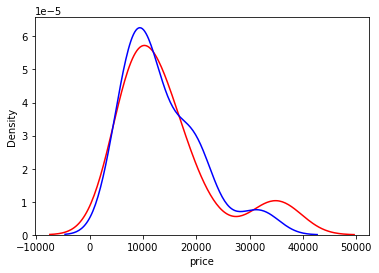

In [118]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Polynomial Regression

In [119]:
X_train_adj = X_train[['width','curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]
X_test_adj = X_test[['width','curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]

In [120]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_adj)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
# Predicting the Test set results
yhat_poly = regressor_poly.predict(poly_reg.transform(X_test_adj))
yhat_poly

array([ 6088.04704726, 11154.10213511, 22682.35867549, 21301.8979611 ,
       19446.9115834 ,  8660.14504363, 12735.00131238,  6468.91398264,
       16623.7411225 ,  7132.82856524, 10798.06047155, 29428.45786928,
        9386.60482663,  9149.93429374, 17478.97538083, 21803.92373896,
        6749.43987788, 12327.33145837,  8788.48511384,  6468.07700203,
        8417.62615181, 11993.74822284, 38716.93410027,  7282.78023266,
       11319.27020907, 29189.28288929,  8365.77914128,  8952.2031877 ,
       13723.80940543, 38716.93410027, 23359.93290454, 16275.38442564,
        6506.57828222, 23063.33447032,  9632.00620272, 11382.30482372,
       12277.81989472, 14865.88903173, 10006.9320164 , 18194.06947633,
        6866.91175459])

## Evaluation

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_poly)

0.7822499725643273

In [123]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_poly)

16498983.130979367

**Visualizing a model for Polynomial Linear Regression**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


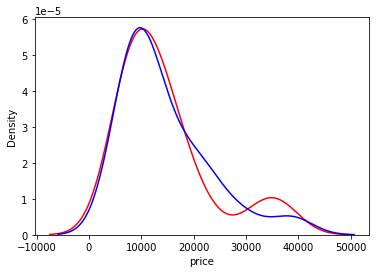

In [124]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_poly, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Decision Tree Regression

In [125]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state=1)
regressor_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [126]:
# Predicting the Test set results
yhat_tree = regressor_tree.predict(X_test)

## Evaluation

In [127]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_tree)

0.9366839297171287

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_tree)

4797477.124661246

**Visualizing a model for Decision Tree Regression**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


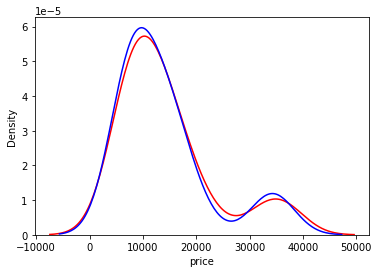

In [128]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_tree, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Support Vector Regression

In [130]:
y_train_adj = pd.DataFrame(y_train)

### Feature Scaling


In [133]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train_adj)
y_train = sc_y.fit_transform(y_train_adj)

In [135]:
# Training the Decision Tree Regression model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [140]:
# Predicting the Test set results
yhat_svr = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test_adj)))

## Evaluation

In [141]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, yhat_svr)

0.8016439489008778

In [143]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_svr)

15029495.88366369

**Visualizing a model for Support Vector Regression**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


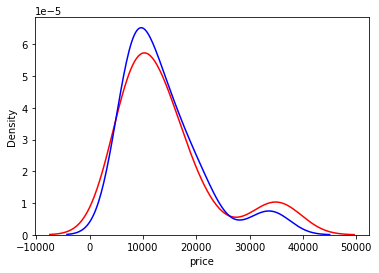

In [144]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_svr, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Decision Making: Determining a Good Model Fit

**Model with the higher R-squared value is a better fit for the data.**

**Model with the smallest MSE value is a better fit for the data.**

Let's take a look at the values for the different models.

### Multiple Linear Regression : 

Using Drive wheels, Width, Curb weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.7964524079994771**

**MSE: 315422860.452957727**

### Polynomial Regression 

Using Width, Curb Weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.7822499725643273**

**MSE: 16498983.130979367**

### Decision Tree Regression

Using Drive wheels, Width, Curb weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.9366839297171287**

**MSE: 4797477.124661246**

### Support Vector Regression 

Using Width, Curb weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.8016439489008778**

**MSE: 15029495.88366369**

## Conclusion:

Comparing these models, we conclude that the Decision Tree Regression model is the best model to be able to predict price from our dataset, followed by SVR and MLR respectively